# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
###TEST ONLY###
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Perth"
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
response = requests.get(query_url).json()
response

{'coord': {'lon': 115.8333, 'lat': -31.9333},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 18.9,
  'feels_like': 19.25,
  'temp_min': 17,
  'temp_max': 19.88,
  'pressure': 1012,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 290},
 'clouds': {'all': 40},
 'dt': 1682259946,
 'sys': {'type': 2,
  'id': 63154,
  'country': 'AU',
  'sunrise': 1682203332,
  'sunset': 1682243260},
 'timezone': 28800,
 'id': 2063523,
 'name': 'Perth',
 'cod': 200}

In [14]:
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = response['coord']['lat']
city_lng = response['coord']['lon']
city_max_temp = response['main']['temp_max']
city_humidity = response['main']['humidity']
city_clouds = response['clouds']['all']
city_wind = response['wind']['speed']
city_country = response['sys']['country']
city_date = response['dt']

print({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

{'City': 'Perth', 'Lat': -31.9333, 'Lng': 115.8333, 'Max Temp': 19.88, 'Humidity': 92, 'Cloudiness': 40, 'Wind Speed': 4.12, 'Country': 'AU', 'Date': 1682259946}


In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | lensk
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | tsiombe
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | tonj
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | tual
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | mokopane
Processing Record 18 of Set 1 | choibalsan
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | sarayonu
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | rio grande
Processing Record 23 of

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.79,89,88,3.13,NZ,1682260633
1,lensk,60.7253,114.9278,-2.17,97,100,3.08,RU,1682260633
2,qaqortoq,60.7167,-46.0333,2.66,66,53,2.06,GL,1682260633
3,badger,64.8000,-147.5333,-12.49,60,40,10.29,US,1682260634
4,hermanus,-34.4187,19.2345,21.56,85,99,4.21,ZA,1682260634


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,89,88,3.13,NZ,1682260633
1,lensk,60.7253,114.9278,-2.17,97,100,3.08,RU,1682260633
2,qaqortoq,60.7167,-46.0333,2.66,66,53,2.06,GL,1682260633
3,badger,64.8000,-147.5333,-12.49,60,40,10.29,US,1682260634
4,hermanus,-34.4187,19.2345,21.56,85,99,4.21,ZA,1682260634


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

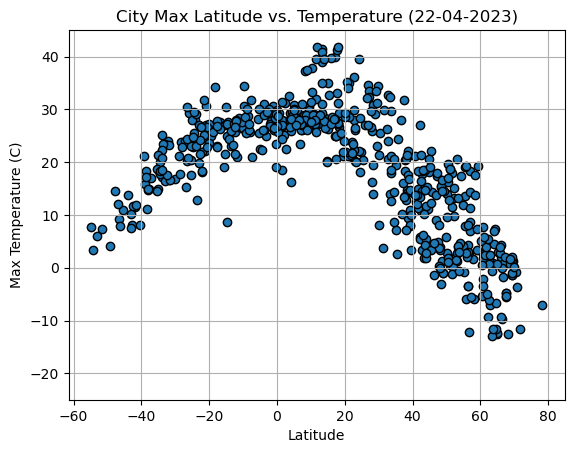

In [20]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(-25, 45)
plt.title("City Max Latitude vs. Temperature (22-04-2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

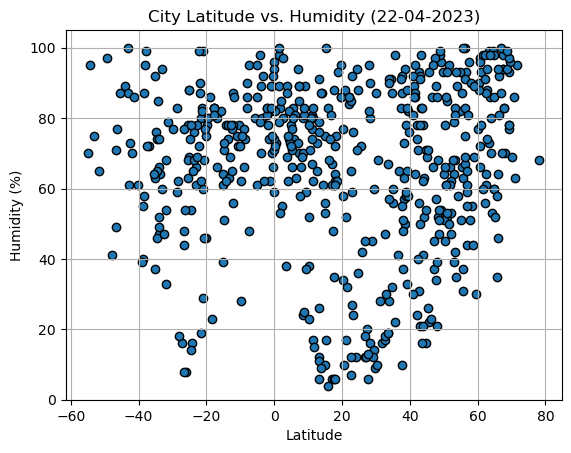

In [21]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(0, 105)
plt.title("City Latitude vs. Humidity (22-04-2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

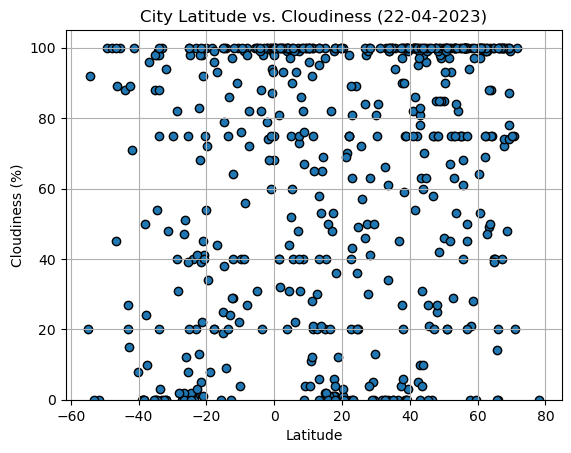

In [22]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(0, 105)
plt.title("City Latitude vs. Cloudiness (22-04-2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

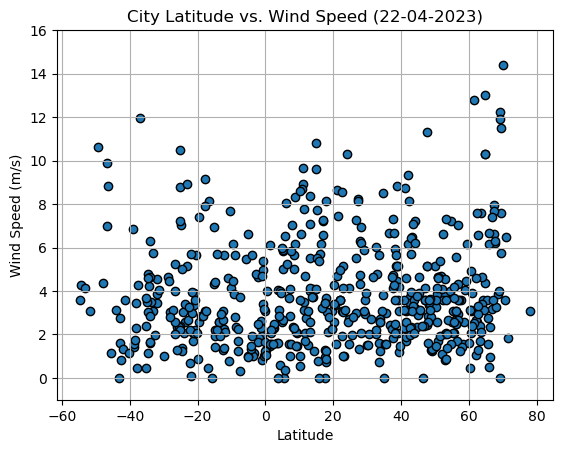

In [23]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(-1, 16)
plt.title("City Latitude vs. Wind Speed (22-04-2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    return line_eq

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lensk,60.7253,114.9278,-2.17,97,100,3.08,RU,1682260633
2,qaqortoq,60.7167,-46.0333,2.66,66,53,2.06,GL,1682260633
3,badger,64.8000,-147.5333,-12.49,60,40,10.29,US,1682260634
6,wailua homesteads,22.0669,-159.3780,20.97,86,75,3.60,US,1682260635
9,tiksi,71.6872,128.8694,-11.58,95,100,1.84,RU,1682260636


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,89,88,3.13,NZ,1682260633
4,hermanus,-34.4187,19.2345,21.56,85,99,4.21,ZA,1682260634
5,alice springs,-23.7000,133.8833,12.75,76,1,2.57,AU,1682260507
7,tsiombe,-25.3000,45.4833,23.76,78,75,2.38,MG,1682260635
8,ushuaia,-54.8000,-68.3000,7.79,70,20,3.60,AR,1682260636


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7192964240934261


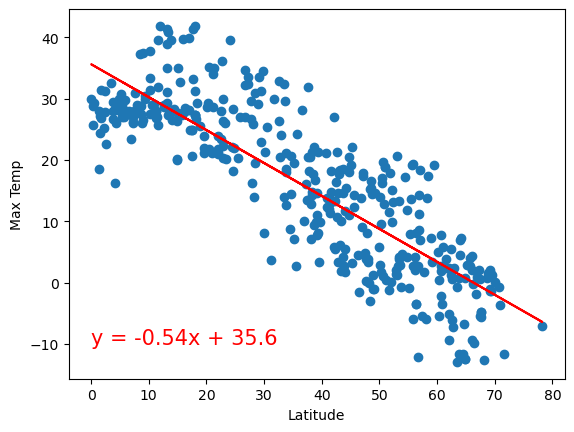

In [27]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
func = linear_regression(x_values,y_values)
plt.annotate(func,(0,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.6038127042692402


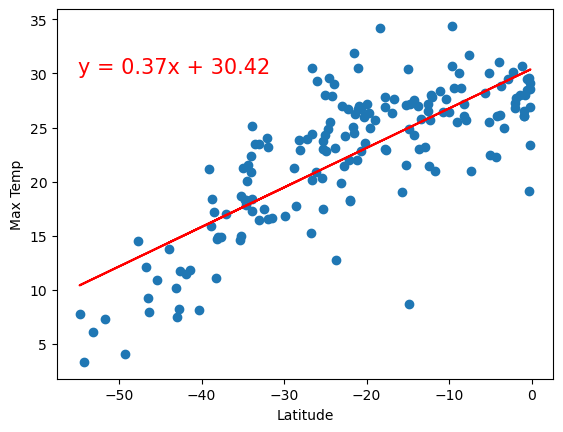

In [28]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
func1 = linear_regression(x_values,y_values)
plt.annotate(func1,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a negative linear relationship between 'Latitude' and 'Max Temp' in the Northern Hemisphere i.e. as we move away from the equator the temperature drops down.

There is a positive linear relationship between 'Latitude' and 'Max Temp' in the Southern Hemisphere i.e. as we move towards the equator the temperature increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.027578146898434946


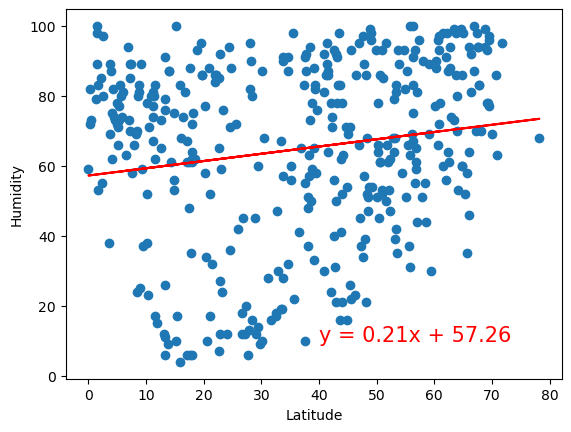

In [29]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
func2 = linear_regression(x_values,y_values)
plt.annotate(func2,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.02975455356369649


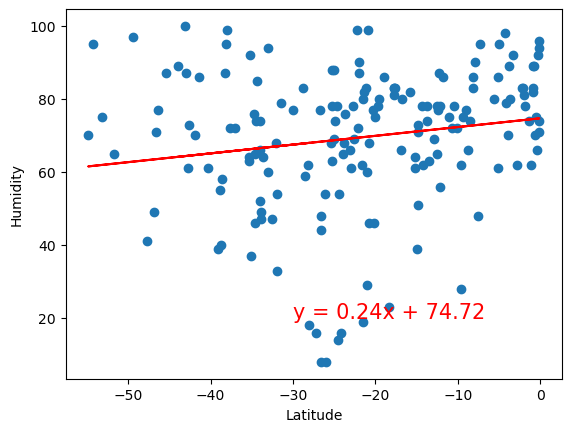

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
func3 = linear_regression(x_values,y_values)
plt.annotate(func3,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE


As per the Linear Regression equation/calculation there appears to be a positive linear relationship between 'Latitude' and 'Humidity' in both the Northern Hemisphere and the Southern Hemespere indicating currently there is Spring Season (warmer temperatures) in the Norther Hemesphere while Autumn Season (cooler temperatures) in the Southern Hemesphere. (As the temperature increases humidity increases.)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.029886625567841444


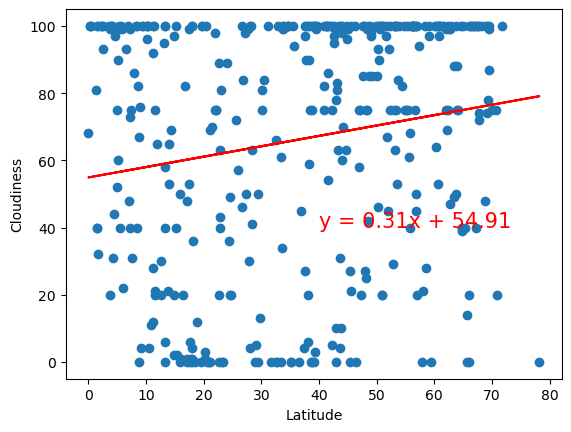

In [31]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
func4 = linear_regression(x_values,y_values)
plt.annotate(func4,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.0931028825927891


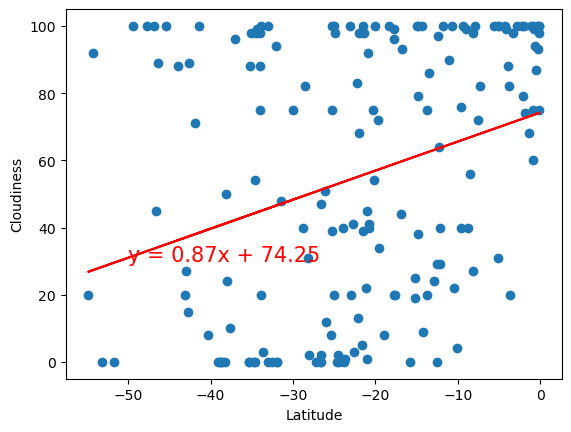

In [32]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
func5 = linear_regression(x_values,y_values)
plt.annotate(func5,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

As per the Linear Regression equation/calculation there appears to be a positive linear relationship between 'Latitude' and 'Cloudiness' in both the Northern Hemisphere and the Southern Hemespere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008978543920692193


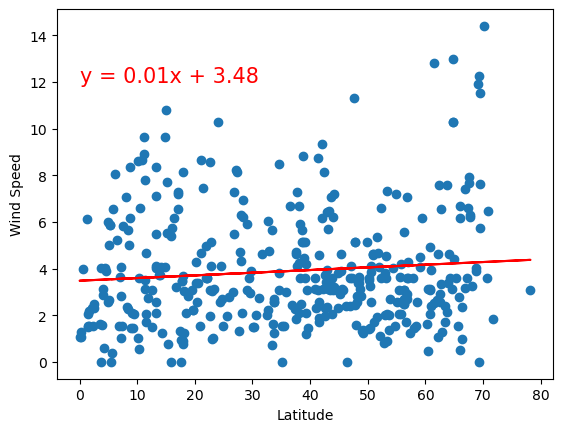

In [33]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
func6 = linear_regression(x_values,y_values)
plt.annotate(func6,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.024908053827073035


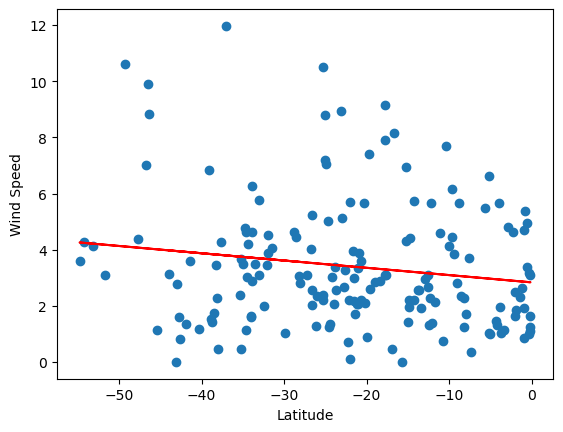

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
func7 = linear_regression(x_values,y_values)
plt.annotate(func7,(-50,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a negative linear relationship between 'Latitude' and 'Wind Speed' in the Northern Hemisphere i.e. as we move away from the equator the wind speed increases.

There is a positive linear relationship between 'Latitude' and 'Wind Speed' in the Southern Hemisphere i.e. as we move towards the equator the wind speed decreases.